In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification   # this for getting the data

In [38]:
x, y = make_classification(n_samples = 2000, n_classes = 2, weights = [1, 1], random_state = 1)


In [39]:
x.shape

(2000, 20)

In [40]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

##### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rand_class = RandomForestClassifier()
rand_class.fit(x_train, y_train) 
ytrain_pred = rand_class.predict_proba(x_train)
print("The ROC Score for Train is: {}".format(roc_auc_score(y_train, ytrain_pred[:, 1])))
ytest_pred = rand_class.predict_proba(x_test)
print("The ROC Score for Test is: {}".format(roc_auc_score(y_test, ytest_pred[:, 1])))

The ROC Score for Train is: 1.0
The ROC Score for Test is: 0.9829277777777776


##### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
ytrain_pred_for_log_reg = log_reg.predict_proba(x_train)
print("The ROC Score for Train is : {}".format(roc_auc_score(y_train, ytrain_pred_for_log_reg[:, 1])))
ytest_pred_for_log_reg = log_reg.predict_proba(x_test)
print("The ROC score for Test is : {}".format(roc_auc_score(y_test, ytest_pred_for_log_reg[:, 1])))

The ROC Score for Train is : 0.9863568922694498
The ROC score for Test is : 0.9885777777777777


##### Adaboost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)
ytrain_pred_for_adaboost = adaboost.predict_proba(x_train)
print("The ROC Score for Train is : {}".format(roc_auc_score(y_train, ytrain_pred_for_adaboost[:, 1])))
ytest_pred_for_adaboost = adaboost.predict_proba(x_test)
print("The ROC Score for Test is : {}".format(roc_auc_score(y_test, ytest_pred_for_adaboost[:, 1])))

The ROC Score for Train is : 0.9975081174960356
The ROC Score for Test is : 0.9826111111111111


##### KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
ytrain_pred_for_knn = knn.predict_proba(x_train)
print("The ROC Score for train is : {}".format(roc_auc_score(y_train, ytrain_pred_for_knn[:, 1])))
ytest_pred_for_knn = knn.predict_proba(x_test)
print("The ROC Score for test is : {}".format(roc_auc_score(y_test, ytest_pred_for_knn[:, 1])))

The ROC Score for train is : 0.981670071491109
The ROC Score for test is : 0.9426111111111111


##### Now we will focus on selecting the best threshold value for accuracy

In [47]:
pred = []

for model in [rand_class, log_reg, adaboost, knn]:
    pred.append(pd.Series(model.predict_proba(x_test)[:, 1]))
final_prediction = pd.concat(pred, axis = 1).mean(axis = 1)
print("Ensemble Test ROC Score is : {}".format(roc_auc_score(y_test, final_prediction)))

Ensemble Test ROC Score is : 0.9846666666666667


In [48]:
fpr, tpr, threshold = roc_curve(y_test, final_prediction)
threshold

array([1.9134413 , 0.9134413 , 0.90543872, 0.90327475, 0.80537052,
       0.8030558 , 0.78949934, 0.78912833, 0.77640513, 0.77571156,
       0.76070853, 0.76037124, 0.74989742, 0.74887362, 0.72526402,
       0.72143711, 0.67538086, 0.67243537, 0.60529968, 0.59675354,
       0.5940152 , 0.59300386, 0.58962652, 0.58864346, 0.58656376,
       0.57486186, 0.57149047, 0.56889283, 0.55292732, 0.54719563,
       0.54494674, 0.53627948, 0.51865858, 0.49616892, 0.45419266,
       0.44472765, 0.4346034 , 0.39905357, 0.39879719, 0.35636723,
       0.35086612, 0.24219741, 0.23640421, 0.20713088, 0.20598417,
       0.12040921, 0.1203351 , 0.10548439])

In [49]:
from sklearn.metrics import accuracy_score 

accuracy_list = []

for thres in threshold:
    y_prediction = np.where(final_prediction > thres, 1, 0)
    accuracy_list.append(accuracy_score(y_test, y_prediction, normalize = True))

accuracy_list = pd.concat([pd.Series(threshold), pd.Series(accuracy_list)], axis = 1)
accuracy_list.columns = ["threshold", "accuracy_list"]
accuracy_list.sort_values(by = "accuracy_list", ascending = False, inplace = True)
accuracy_list.head()

,threshold,accuracy_list
35,0.444728,0.961667
36,0.434603,0.960000
34,0.454193,0.960000
33,0.496169,0.958333
32,0.518659,0.956667


##### From the above result we can conclude that the best threshold value is 0.447103 since for this we are getting the highest accuracy

In [50]:
accuracy_list

,threshold,accuracy_list
35,0.444728,0.961667
36,0.434603,0.960000
34,0.454193,0.960000
33,0.496169,0.958333
32,0.518659,0.956667
31,0.536279,0.956667
30,0.544947,0.955000
29,0.547196,0.955000
28,0.552927,0.953333
37,0.399054,0.951667


In [51]:
def draw_roc_curve(fpr, tpr):
    plt.figure(figsize = (8, 6))
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "dashed")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

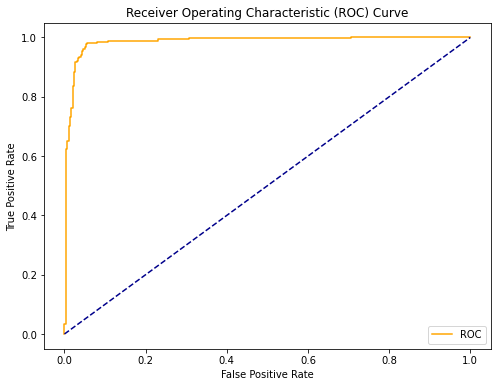

In [52]:
draw_roc_curve(fpr, tpr)